In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("my2025-fuel-consumption-ratings.csv", encoding='Latin-1')
df.describe()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\site-packages\traitlets\config\application.py", line 1075, 

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\adamg\PycharmProjects\Python\.conda\lib\site-packages\traitlets\config\application.py", line 1075, 

AttributeError: _ARRAY_API not found

,Model year,Engine_size,Cylinders,City (L/100 km),Highway (L/100 km),Combined,Combined (mpg),CO2emissions,CO2 rating,Smog rating
count,649.0,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2025.0,2.963790,5.354391,12.008166,9.190755,10.742373,28.204931,251.898305,4.634823,4.932203
std,0.0,1.202646,1.814929,3.394469,2.182091,2.791412,8.087269,64.873206,1.331279,1.333922
min,2025.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2025.0,2.000000,4.000000,9.700000,7.600000,8.800000,23.000000,206.000000,4.000000,4.000000
50%,2025.0,2.500000,4.000000,11.900000,9.000000,10.600000,27.000000,250.000000,5.000000,5.000000
75%,2025.0,3.500000,6.000000,14.100000,10.500000,12.500000,32.000000,293.000000,5.000000,6.000000
max,2025.0,8.000000,16.000000,29.700000,19.200000,25.000000,64.000000,586.000000,8.000000,7.000000


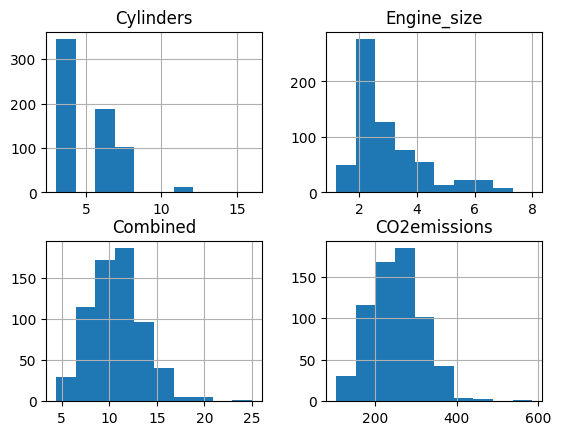

In [2]:
cdf = df[['Cylinders','Engine_size','Combined','CO2emissions']]
viz = cdf[['Cylinders','Engine_size','Combined','CO2emissions']]
viz.hist()
plt.show()

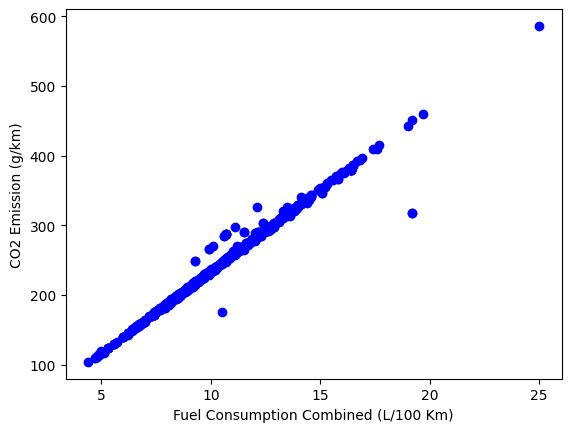

In [3]:
plt.scatter(cdf.Combined, cdf.CO2emissions, color = 'blue')
plt.xlabel("Fuel Consumption Combined (L/100 Km)")
plt.ylabel("CO2 Emission (g/km)")
plt.show()

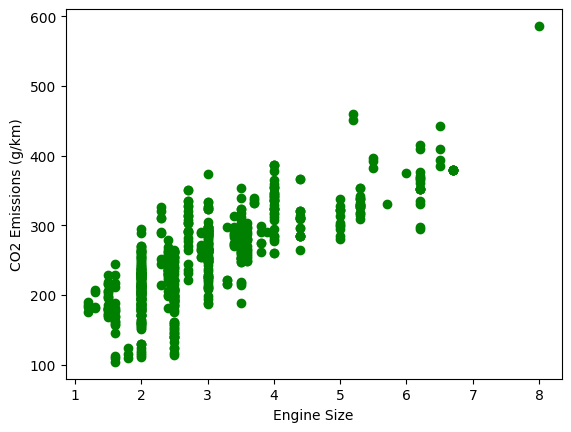

In [26]:

plt.scatter(cdf.Engine_size, cdf.CO2emissions, color = 'green')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

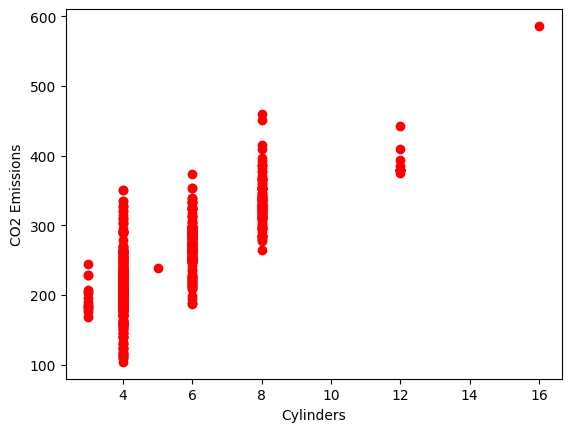

In [ ]:
plt.scatter(cdf.Cylinders, cdf.CO2emissions, color = 'red')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X = cdf.Combined.to_numpy()
y = cdf.CO2emissions.to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (519,), (519,))

In [20]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)
print ('Coefficients: ', regressor.coef_[0]) 
print ('Intercept: ',regressor.intercept_)

Coefficients:  23.13784241300021
Intercept:  3.6661022338633984


Text(0, 0.5, 'CO2 Emission (g/km)')

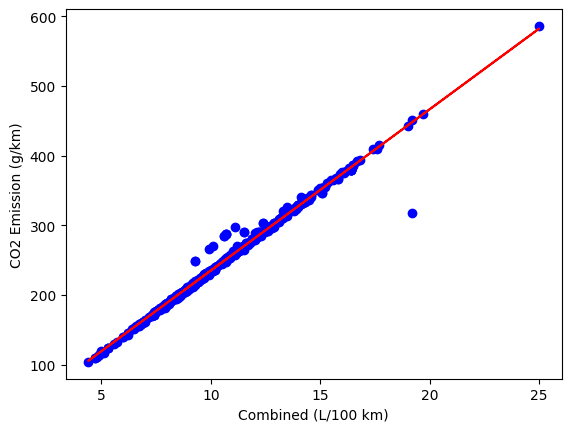

In [28]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Combined (L/100 km)")
plt.ylabel("CO2 Emission (g/km)")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))

Mean absolute error: 3.97
Mean squared error: 205.66
Root mean squared error: 14.34
R2-score: 0.95
Mean squared error: 205.66
